<a href="https://colab.research.google.com/github/AcerPing/NTUT_FinancialBigData/blob/main/%E5%9C%8B%E7%AB%8B%E8%87%BA%E5%8C%97%E7%A7%91%E6%8A%80%E5%A4%A7%E5%AD%B8_%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_%E4%BD%9C%E6%A5%AD5_%E9%9B%86%E7%BE%A4%E5%88%86%E6%9E%90(20230526).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#_____________________________importing required libraries for dataframe(df) & Visuvalization________________________________#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#_______________________________importing libraries that are reqiuired for clustering________________________________________#
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#____________________________importing warnings to avoid unneccessary information___________________________________________#
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'cp1252' , header=0)
if df.shape[0] != 541898: raise Exception
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom
2,536756,10002,INFLATABLE POLITICAL GLOBE,1,02-12-2010 14:23,0.85,NaN,United Kingdom
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom
4,536865,10002,INFLATABLE POLITICAL GLOBE,5,03-12-2010 11:28,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541893,C572347,S,SAMPLES,-1,24-10-2011 11:03,33.05,NaN,United Kingdom
541894,572849,S,SAMPLES,1,26-10-2011 12:20,33.05,NaN,United Kingdom
541895,C577330,S,SAMPLES,-1,18-11-2011 14:16,2.89,NaN,United Kingdom
541896,C577330,S,SAMPLES,-1,18-11-2011 14:16,75.00,NaN,United Kingdom


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(406818, 8)

In [ ]:
# Changing the datatype of Customer Id as per Business understanding

df['CustomerID'] = df['CustomerID'].astype(str)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,05-12-2010 11:02,0.85,13069.0,United Kingdom
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,06-12-2010 08:42,0.85,17677.0,United Kingdom
...,...,...,...,...,...,...,...,...
541830,581493,POST,POSTAGE,1,09-12-2011 10:10,15.00,12423.0,Belgium
541831,581494,POST,POSTAGE,2,09-12-2011 10:13,18.00,12518.0,Germany
541832,581570,POST,POSTAGE,1,09-12-2011 11:59,18.00,12662.0,Germany
541833,581574,POST,POSTAGE,2,09-12-2011 12:09,18.00,12526.0,Germany


In [ ]:
# df.to_csv('OnlineRetailExcel.csv')

In [ ]:
# New Attribute : Amount:
df['Amount'] = df['Quantity']*df['UnitPrice']
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,01-12-2010 08:45,0.85,12583.0,France,40.80
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,01-12-2010 09:45,0.85,16098.0,United Kingdom,10.20
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,03-12-2010 11:19,0.85,17967.0,United Kingdom,0.85
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,05-12-2010 11:02,0.85,13069.0,United Kingdom,0.85
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,06-12-2010 08:42,0.85,17677.0,United Kingdom,20.40
...,...,...,...,...,...,...,...,...,...
541830,581493,POST,POSTAGE,1,09-12-2011 10:10,15.00,12423.0,Belgium,15.00
541831,581494,POST,POSTAGE,2,09-12-2011 10:13,18.00,12518.0,Germany,36.00
541832,581570,POST,POSTAGE,1,09-12-2011 11:59,18.00,12662.0,Germany,18.00
541833,581574,POST,POSTAGE,2,09-12-2011 12:09,18.00,12526.0,Germany,36.00


In [ ]:
# New Attribute : Frequency
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
# rfm_f.head()
rfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [ ]:
# New Attribute : Recency

# Convert to datetime to proper datatype

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
# # Compute the maximum date to know the last transaction date

# max_date = max(df['InvoiceDate'])
# max_date

In [ ]:
# max_date = max(df['InvoiceDate'])
from datetime import datetime
max_date = datetime.today().strftime('%Y-%m-%d %H:%M:%S')
max_date = pd.to_datetime(max_date)
max_date

Timestamp('2023-05-09 03:05:01')

In [ ]:
# Compute the difference between max date and transaction date

df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France,40.80,4541 days 18:20:01
1,536382,10002,INFLATABLE POLITICAL GLOBE,12,2010-12-01 09:45:00,0.85,16098.0,United Kingdom,10.20,4541 days 17:20:01
3,536863,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-03 11:19:00,0.85,17967.0,United Kingdom,0.85,4539 days 15:46:01
6,537047,10002,INFLATABLE POLITICAL GLOBE,1,2010-12-05 11:02:00,0.85,13069.0,United Kingdom,0.85,4537 days 16:03:01
7,537227,10002,INFLATABLE POLITICAL GLOBE,24,2010-12-06 08:42:00,0.85,17677.0,United Kingdom,20.40,4536 days 18:23:01


In [ ]:
# Compute last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346.0,4493 days 16:48:01
1,12347.0,4170 days 11:13:01
2,12348.0,4243 days 13:52:01
3,12349.0,4186 days 17:14:01
4,12350.0,4478 days 11:04:01


In [ ]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346.0,4493
1,12347.0,4170
2,12348.0,4243
3,12349.0,4186
4,12350.0,4478


In [ ]:
# Merging the two dfs
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [ ]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,4493
1,12347.0,4310.00,182,4170
2,12348.0,1797.24,31,4243
3,12349.0,1757.55,73,4186
4,12350.0,334.40,17,4478
...,...,...,...,...
4367,18280.0,180.60,10,4445
4368,18281.0,80.82,7,4348
4369,18282.0,176.60,13,4175
4370,18283.0,2094.88,756,4171


 Silhouette Score

In [6]:
# df = pd.read_csv('OnlineRetailNormalization.csv', encoding= 'cp1252' , header=0)
# df

,Recency,Frequency,Money
0,0.871658,0.000125,0.015109
1,0.005348,0.022676,0.030297
2,0.200535,0.003758,0.021442
3,0.050802,0.009020,0.021303
4,0.828877,0.002005,0.016288
...,...,...,...
4367,0.743316,0.001128,0.015746
4368,0.483957,0.000752,0.015394
4369,0.021390,0.001503,0.015731
4370,0.010695,0.094588,0.022491


分數: [0.7277265305117034, 0.6572007995307086, 0.5791976037246892, 0.5692073309190516, 0.5791507960425168, 0.5613742540580735, 0.49754174232672843, 0.49925031274014886, 0.4984182174979828]
K 值: [2, 3, 4, 5, 6, 7, 8, 9, 10]


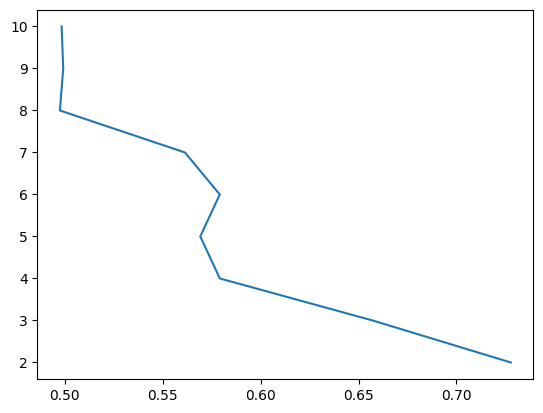

In [7]:
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# %matplotlib inline
# scores = []
# ks = []
# for i in range(2,11):
#   clu = KMeans(n_clusters = i)
#   clu.fit(df)
#   clu_score = silhouette_score(df, clu.labels_)
#   scores.append(clu_score)
#   ks.append(i)
# print("分數:", scores)
# print("K 值:", ks)
# plt.plot(scores, ks)

In [16]:
# pd.DataFrame({'K值':ks,
#        'Silhouette Score分數':scores},)

,K值,Silhouette Score分數
0,2,0.727727
1,3,0.657201
2,4,0.579198
3,5,0.569207
4,6,0.579151
5,7,0.561374
6,8,0.497542
7,9,0.499250
8,10,0.498418


In [5]:
# scores.sort(reverse=True)
# scores

[0.7277265305117034,
 0.6572007995307086,
 0.5791860238890987,
 0.5692917824436606,
 0.566101016874289,
 0.5460448244181147,
 0.4989000181263797,
 0.498315865090864,
 0.4896730968330409]